In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [2]:
jnatprod = pd.read_csv('data/entities_img_dataframe_jnatprod.tsv', sep='\t')  
metabo = pd.read_csv('data/entities_img_dataframe_metabo.tsv', sep='\t')
phytorev = pd.read_csv('data/entities_img_dataframe_phytorev.tsv', sep='\t')  
qn = pd.read_csv('data/entities_img_dataframe_qn.tsv', sep='\t')
chrom_a = pd.read_csv('data/entities_img_dataframe_chroma_a.tsv', sep='\t')
chrom_b = pd.read_csv('data/entities_img_dataframe_chroma_b.tsv', sep='\t')

/opt/conda/envs/nplibrary/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/nplibrary/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
jnatprod = pd.concat([pd.DataFrame(['jnatprod']*jnatprod.shape[0], 
                                   columns=['journal']), jnatprod], axis=1, sort=False)
metabo = pd.concat([pd.DataFrame(['metabo']*metabo.shape[0], 
                                   columns=['journal']), metabo], axis=1, sort=False)
phytorev = pd.concat([pd.DataFrame(['phytorev']*phytorev.shape[0], 
                                   columns=['journal']), phytorev], axis=1, sort=False)
qn = pd.concat([pd.DataFrame(['qn']*qn.shape[0], 
                             columns=['journal']), qn], axis=1, sort=False)
chrom_a = pd.concat([pd.DataFrame(['chrom_a']*chrom_a.shape[0], 
                                  columns=['journal']), chrom_a], axis=1, sort=False)
chrom_b = pd.concat([pd.DataFrame(['chrom_b']*chrom_b.shape[0], 
                                  columns=['journal']), chrom_b], axis=1, sort=False)

In [4]:
comp = pd.concat([jnatprod, metabo, phytorev, 
                  qn, chrom_a, chrom_b])
comp.loc[comp['pubchem'].isnull(), 'pubchem'] = 0
comp['pubchem'] = comp['pubchem'].astype(str)
comp.loc[comp['pubchem'].str.contains('csid'), 'pubchem'] = 0
comp['pubchem'] = comp['pubchem'].astype(float)
comp['pubchem'] = comp['pubchem'].astype(int)
comp.loc[comp['pubchem']==0, 'pubchem'] = ''
comp.fillna('', inplace=True)
comp.reset_index(drop=True, inplace=True)
comp.head()

,journal,doi,smiles,standardInChIKey,ExactMolWt,pubchem,standardInChI,source
0,jnatprod,np50051a041,,MBMQEIFVQACCCH-QBODLPLBSA-N,318.146724,5281576,InChI=1S/C18H22O5/c1-12-6-5-9-14(19)8-4-2-3-7-...,oscar
1,jnatprod,np50051a041,,RGSFGYAAUTVSQA-UHFFFAOYSA-N,70.078250,9253,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,oscar
2,jnatprod,np50051a041,,OKTJSMMVPCPJKN-UHFFFAOYSA-N,12.000000,5462310,InChI=1S/C,oscar
3,jnatprod,np50051a041,,BUGBHKTXTAQXES-UHFFFAOYSA-N,79.916521,6326970,InChI=1S/Se,oscar
4,jnatprod,np50051a041,,OKTJSMMVPCPJKN-UHFFFAOYSA-N,12.000000,5462310,InChI=1S/C,oscar


In [5]:
comp.shape

(1533872, 8)

In [6]:
tab1 = comp.groupby(['journal'])[['doi', 'standardInChIKey', 'pubchem']].agg(['nunique'])
tab1

,doi,standardInChIKey,pubchem
,nunique,nunique,nunique
journal,,,
chrom_a,22786,36045,29056
chrom_b,10202,25928,18365
jnatprod,14058,53006,31563
metabo,1409,6284,5450
phytorev,774,14321,9599
qn,6153,17946,11188


In [7]:
tab1['standardInChIKey'] = tab1['standardInChIKey']-1
tab1['pubchem'] = tab1['pubchem']-1
tab1

,doi,standardInChIKey,pubchem
,nunique,nunique,nunique
journal,,,
chrom_a,22786,36044,29055
chrom_b,10202,25927,18364
jnatprod,14058,53005,31562
metabo,1409,6283,5449
phytorev,774,14320,9598
qn,6153,17945,11187


In [8]:
pd.concat([tab1['standardInChIKey']/120969, tab1['pubchem']/73428], axis=1)

,nunique,nunique
journal,,
chrom_a,0.297961,0.395694
chrom_b,0.214328,0.250095
jnatprod,0.438170,0.429836
metabo,0.051939,0.074209
phytorev,0.118377,0.130713
qn,0.148344,0.152353


In [9]:
tab1['pubchem']/tab1['standardInChIKey']

,nunique
journal,
chrom_a,0.806098
chrom_b,0.708296
jnatprod,0.595453
metabo,0.867261
phytorev,0.670251
qn,0.623405


In [10]:
pd.concat([tab1['standardInChIKey']/tab1['doi'], tab1['pubchem']/tab1['doi']], axis=1)

,nunique,nunique
journal,,
chrom_a,1.581849,1.275125
chrom_b,2.541364,1.800039
jnatprod,3.770451,2.245127
metabo,4.459191,3.867282
phytorev,18.501292,12.400517
qn,2.916464,1.818137


In [11]:
# Have to remove the '' for each journal
chrom_a = comp.loc[comp['journal']=='chrom_a', 'standardInChIKey'].unique().tolist()
chrom_a.remove('')
len(chrom_a)

36044

In [12]:
# Number of unique compounds, total unique 
len(comp['standardInChIKey'].unique())

120970

In [13]:
# Number of unique pubchem ids, total unique 
len(comp['pubchem'].unique())

73429

In [14]:
# Number of structures by paper
comp['doi'].value_counts()

S0021967300915255           2453
S0021967301916139           1660
S0021967301879139           1550
S0021967301876688           1479
S0021967300940986           1395
                            ... 
Vol25No2_186_02                1
S0021967301994567              1
S002196730091330X              1
Vol31No6_1573_48-NT07503       1
Vol15No4_328_v15_n4__9_        1
Name: doi, Length: 55382, dtype: int64

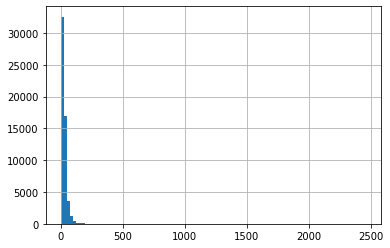

In [15]:
comp['doi'].value_counts().hist(bins=100)

In [16]:
# Number of occurencies of each compound
comp['standardInChIKey'].value_counts()

                               184817
XLYOFNOQVPJJNP-UHFFFAOYSA-N     47712
OKKJLVBELUTLKV-UHFFFAOYSA-N     39031
WEVYAHXRMPXWCK-UHFFFAOYSA-N     19854
OKTJSMMVPCPJKN-UHFFFAOYSA-N     18616
                                ...  
UGSXDGAMMVTKSU-UHFFFAOYSA-N         1
KMGMRELINJXTGB-JKNGZLQRSA-N         1
SZPPKQYKHDNQKI-JBZHPUCOSA-N         1
QNXDEBZEUMVFNP-UHFFFAOYSA-N         1
FNZPZCTVRVPPAB-YZSQHPIKSA-N         1
Name: standardInChIKey, Length: 120970, dtype: int64

In [17]:
idx = comp[comp['standardInChIKey'].isin(comp['standardInChIKey'].value_counts().head(10).index)].index

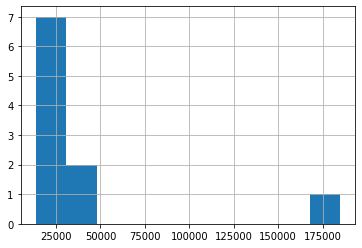

In [18]:
comp.loc[idx, 'standardInChIKey'].value_counts().hist()

In [19]:
gn_jnatprod = pd.read_csv('data/gn_dataframe_jnatprod.tsv', sep='\t')  
gn_metabo = pd.read_csv('data/gn_dataframe_metabo.tsv', sep='\t')  
gn_phytorev = pd.read_csv('data/gn_dataframe_phytorev.tsv', sep='\t')  
gn_qn = pd.read_csv('data/gn_dataframe_qn.tsv', sep='\t')
gn_chrom_a = pd.read_csv('data/gn_dataframe_chroma_a.tsv', sep='\t')
gn_chrom_b = pd.read_csv('data/gn_dataframe_chroma_b.tsv', sep='\t')

gn_jnatprod = pd.concat([pd.DataFrame(['jnatprod']*gn_jnatprod.shape[0], 
                                   columns=['journal']), gn_jnatprod], axis=1, sort=False)
gn_metabo = pd.concat([pd.DataFrame(['metabo']*gn_metabo.shape[0], 
                                   columns=['journal']), gn_metabo], axis=1, sort=False)
gn_phytorev = pd.concat([pd.DataFrame(['phytorev']*gn_phytorev.shape[0], 
                                   columns=['journal']), gn_phytorev], axis=1, sort=False)
gn_qn = pd.concat([pd.DataFrame(['qn']*gn_qn.shape[0], 
                             columns=['journal']), gn_qn], axis=1, sort=False)
gn_chrom_a = pd.concat([pd.DataFrame(['chrom_a']*gn_chrom_a.shape[0], 
                                  columns=['journal']), gn_chrom_a], axis=1, sort=False)
gn_chrom_b = pd.concat([pd.DataFrame(['chrom_b']*gn_chrom_b.shape[0], 
                                  columns=['journal']), gn_chrom_b], axis=1, sort=False)


dfnms = pd.concat([gn_jnatprod, gn_metabo,
                gn_phytorev, gn_qn,
                gn_chrom_a, gn_chrom_b])
dfnms.reset_index(drop=True, inplace=True)
dfnms.head()

,journal,doi,verbatim,odds,dataSourceId,taxonId,classificationPath,classificationRank,matchType
0,jnatprod,np100762s_gn.txt,Mammea americana,3.691610e+07,1.0,53490549,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus|species,ExactCanonicalMatch
1,jnatprod,np100762s_gn.txt,Mammea,1.110529e+04,1.0,54930310,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus,ExactMatch
2,jnatprod,np100762s_gn.txt,Mammea americana,3.691610e+07,1.0,53490549,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus|species,ExactCanonicalMatch
3,jnatprod,np100762s_gn.txt,Mammea,1.110529e+04,1.0,54930310,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus,ExactMatch
4,jnatprod,np100762s_gn.txt,Mammea,1.110529e+04,1.0,54930310,Plantae|Tracheophyta|Magnoliopsida|Malpighiale...,kingdom|phylum|class|order|family|genus,ExactMatch


In [20]:
dfnms.shape

(699909, 9)

In [21]:
# Total occurencies of taxon
dfnms.fillna('', inplace=True)
sum(dfnms['taxonId']=='')

152525

In [22]:
# Number of no matches
sum(dfnms['matchType']=='NoMatch')

152510

In [23]:
# Match types
dfnms['matchType'].unique()

array(['ExactCanonicalMatch', 'ExactMatch', 'ExactPartialMatch',
       'FuzzyCanonicalMatch', 'NoMatch', 'FuzzyPartialMatch'],
      dtype=object)

In [24]:
# Number dois present in the search
len(dfnms['doi'].unique())

42597

In [25]:
# Number of unique taxon
len(dfnms.loc[dfnms['matchType']!='NoMatch','taxonId'].unique())

49907

In [26]:
dfnms['classification'] = dfnms['classificationPath'].apply(lambda a: a.split('|')[-1])
dfnms['Rank'] = dfnms['classificationRank'].apply(lambda a: a.split('|')[-1])
dfnms[['classification', 'Rank']].head()

,classification,Rank
0,Mammea americana,species
1,Mammea,genus
2,Mammea americana,species
3,Mammea,genus
4,Mammea,genus


In [27]:
dfnms.loc[dfnms['Rank']=='species', 'classification'].value_counts().head()

Escherichia coli         4199
Staphylococcus aureus    2947
Candida albicans         1698
Bacillus subtilis        1651
Catharanthus roseus      1518
Name: classification, dtype: int64

In [28]:
dfnms[dfnms['Rank']=='species'].groupby(['journal'])[['doi', 'classification']].agg(['nunique'])

,doi,classification
,nunique,nunique
journal,,
chrom_a,1991,2901
chrom_b,3039,2962
jnatprod,12385,13265
metabo,737,1563
phytorev,752,8596
qn,1612,3541


In [29]:
len(dfnms.loc[dfnms['Rank']=='species', 'classification'].unique())

21526

In [30]:
dfnms[dfnms['Rank']=='family'].groupby(['journal'])[['doi', 'classification']].agg(['nunique'])

,doi,classification
,nunique,nunique
journal,,
chrom_a,280,160
chrom_b,459,217
jnatprod,7945,842
metabo,143,117
phytorev,523,549
qn,629,295


In [31]:
len(dfnms.loc[dfnms['Rank']=='family', 'classification'].unique())

1153

In [32]:
name = dfnms.loc[dfnms['Rank']=='species', 'classification'].value_counts().head().index.tolist()
val = dfnms.loc[dfnms['Rank']=='species', 'classification'].value_counts().head().values.tolist()

val

[4199, 2947, 1698, 1651, 1518]

([<matplotlib.patches.Wedge at 0x7f0a29338668>,
 [Text(0.5008115710591806, 0.9793813201676023, 'Escherichia coli'),
  Text(-1.0832579886034621, 0.19118611384402787, 'Staphylococcus aureus'),
  Text(-0.5567953619470039, -0.9486721904400408, 'Candida albicans'),
  Text(0.3720893192614984, -1.0351567700070916, 'Bacillus subtilis'),
  Text(1.014455550941672, -0.42529981796801747, 'Catharanthus roseus')])

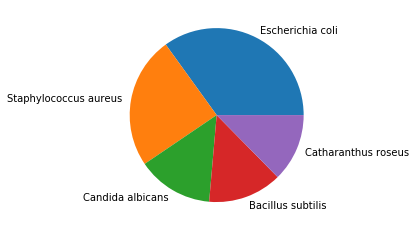

In [33]:
plt.pie(val, labels=name)

In [34]:
plt.pie(val, labels=name)
with PdfPages('pie_chart.pdf') as pdf:
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

In [35]:
dfnms.columns

Index(['journal', 'doi', 'verbatim', 'odds', 'dataSourceId', 'taxonId',
       'classificationPath', 'classificationRank', 'matchType',
       'classification', 'Rank'],
      dtype='object')

In [36]:
template = dfnms.loc[0, 'classificationRank'].split('|')

path = []

for i in dfnms.index:
    tmp = ['']*len(template) 
    if pd.isnull(dfnms.loc[i, 'classificationRank']):
        path.append(tmp)
        continue
    opath = np.array(dfnms.loc[i, 'classificationPath'].split('|'))
    rank = np.array(dfnms.loc[i, 'classificationRank'].split('|'))  
    for j in range(len(template)):
        if template[j] in rank:
            tmp[j] = opath[rank==template[j]][0]
    path.append(tmp)

In [37]:
dfpath = pd.DataFrame(path)
dfpath.columns = template
dfpath.head()

,kingdom,phylum,class,order,family,genus,species
0,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,Mammea americana
1,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,
2,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,Mammea americana
3,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,
4,Plantae,Tracheophyta,Magnoliopsida,Malpighiales,Calophyllaceae,Mammea,


In [38]:
dfpath.shape

(699909, 7)

In [39]:
journals = {'jnatprod': 'Journal Natural Products', 'metabo':'Metabolomics',
           'phytorev': 'Phytochemistry Reviews', 'qn': 'Química Nova',
           'chrom_a': 'Journal of Chromatography A', 'chrom_b': 'Journal of Chromatography B'}

with PdfPages('genus_by_journal.pdf') as pdf:
    for k,v in journals.items():
        if k=='qn':
            pie_vals = dfpath.loc[dfnms['journal']==k,'genus'].value_counts()[2:11]
        else:
            pie_vals = dfpath.loc[dfnms['journal']==k,'genus'].value_counts()[1:11]            
        plt.pie(pie_vals.values, labels=pie_vals.index, autopct='%1.1f%%')
        plt.title(v)
        pdf.savefig()
        plt.close()

In [40]:
dfpath.loc[dfnms['journal']=='qn','genus'].value_counts()

Figura              45456
                    32521
Mater                4239
Vieira               1405
Soares               1033
                    ...  
Thyrinteina             1
Saraswati               1
Fervidobacterium        1
Fomitopsis              1
Massilia                1
Name: genus, Length: 4503, dtype: int64

In [41]:
 dfpath[(dfnms['journal']=='metabo') & (dfpath['genus']=='Caba')].tail()

,kingdom,phylum,class,order,family,genus,species
300356,,Arthropoda,Insecta,Hymenoptera,Vespidae,Caba,
300357,,Arthropoda,Insecta,Hymenoptera,Vespidae,Caba,
300358,,Arthropoda,Insecta,Hymenoptera,Vespidae,Caba,
300361,,Arthropoda,Insecta,Hymenoptera,Vespidae,Caba,
300364,,Arthropoda,Insecta,Hymenoptera,Vespidae,Caba,


In [42]:
with PdfPages('species_by_journal.pdf') as pdf:
    for k,v in journals.items():
        pie_vals = dfpath.loc[dfnms['journal']==k,'species'].value_counts()[1:11]            
        plt.pie(pie_vals.values, labels=pie_vals.index, autopct='%1.1f%%')
        plt.title(v)
        pdf.savefig()
        plt.close()

In [43]:
dfpath['kingdom'].value_counts()

                  326786
Plantae           185307
Animalia          103081
Bacteria           40115
Fungi              37861
Chromista           3048
Protista            1229
Metazoa              876
Protozoa             557
Viridiplantae        537
Archaea              510
Archaeplastida         1
Chlorobiota            1
Name: kingdom, dtype: int64

In [44]:
dfpath.loc[dfpath['kingdom']=='Bacteria', 'genus'].value_counts()

Escherichia       5040
Streptomyces      4476
Staphylococcus    3838
Pseudomonas       2820
Bacillus          2696
                  ... 
Brachymonas          1
Sulfurovum           1
Idiomarina           1
Planobispora         1
Spirochaeta          1
Name: genus, Length: 563, dtype: int64

In [45]:
sizes = {'Arabidopsis':5294, 'Catharanthus':2041, 'Salvia':1943, 'Osaka': 3326,
        'Vieira': 1986, 'Ikeda': 1890, 'Escherichia': 5040, 'Streptomyces': 4476,
         'Aspergillus': 3941, 'Candida': 2996, 'Fusarium': 1916,
        'Staphylococcus': 3838, 'Sulfolobus': 57, 'Halobacterium': 44,
        'Methanobacterium':  28}
sizes

{'Arabidopsis': 5294,
 'Catharanthus': 2041,
 'Salvia': 1943,
 'Osaka': 3326,
 'Vieira': 1986,
 'Ikeda': 1890,
 'Escherichia': 5040,
 'Streptomyces': 4476,
 'Aspergillus': 3941,
 'Candida': 2996,
 'Fusarium': 1916,
 'Staphylococcus': 3838,
 'Sulfolobus': 57,
 'Halobacterium': 44,
 'Methanobacterium': 28}

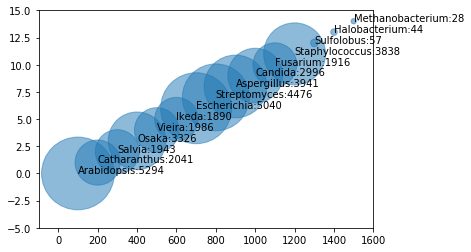

In [46]:
x = np.arange(1, len(sizes)+1)*100
y = range(len(sizes))

labels = []
for k,v in sizes.items():
    labels.append(f'{k}:{v}')


plt.xlim(-100, 1600)
plt.ylim(-5, 15)
plt.scatter(x, y, s=list(sizes.values()), alpha=0.5)
for label, i, j in zip(labels, x, y):
    plt.annotate(label, xy = (i, j))

In [47]:
x = np.arange(1, len(sizes)+1)*100
y = range(len(sizes))

labels = []
for k,v in sizes.items():
    labels.append(f'{k}:{v}')


with PdfPages('proportion_genus.pdf') as pdf:
    plt.xlim(-100, 1600)
    plt.ylim(-5, 15)
    plt.scatter(x, y, s=list(sizes.values()), alpha=0.5)
    for label, i, j in zip(labels, x, y):
        plt.annotate(label, xy = (i, j))
    pdf.savefig()
    plt.close()